In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os

In [12]:
df= pd.read_csv("data.csv",sep=';')

print(df.head())

              filename  crack  inactive
0  images/cell2044.png      1         0
1  images/cell0123.png      0         0
2  images/cell2241.png      0         0
3  images/cell2426.png      0         0
4  images/cell1552.png      0         0


In [13]:
print("\nCount per defect type:")
print(df[['crack', 'inactive']].sum())


Count per defect type:
crack       443
inactive    122
dtype: int64


In [14]:
no_defects = ((df['crack'] == 0) & (df['inactive'] == 0)).sum()
print(f"\nWorking cells (no defect): {no_defects}")


Working cells (no defect): 1545


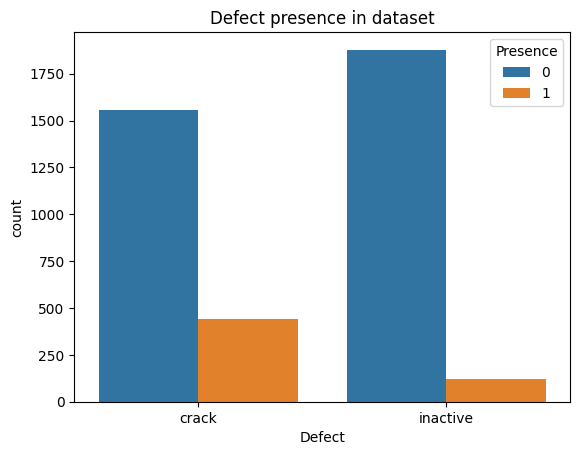

In [15]:
df_melt = df.melt(value_vars=['crack', 'inactive'], var_name='Defect', value_name='Presence')

sns.countplot(data=df_melt, x='Defect', hue='Presence')
plt.title("Defect presence in dataset")
plt.show()

filename    images/cell2044.png
crack                         1
inactive                      0
Name: 0, dtype: object
images\images/cell2044.png


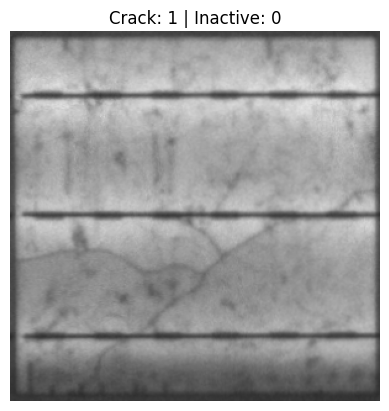

filename    images/cell0123.png
crack                         0
inactive                      0
Name: 1, dtype: object
images\images/cell0123.png


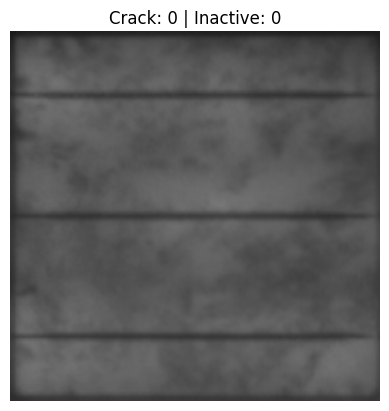

filename    images/cell2241.png
crack                         0
inactive                      0
Name: 2, dtype: object
images\images/cell2241.png


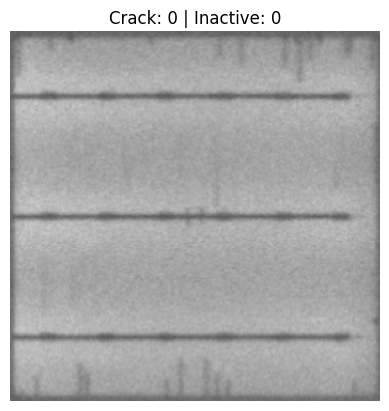

filename    images/cell2426.png
crack                         0
inactive                      0
Name: 3, dtype: object
images\images/cell2426.png


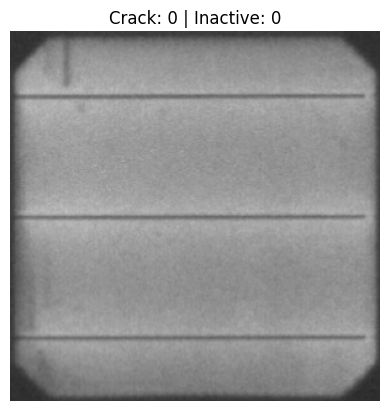

filename    images/cell1552.png
crack                         0
inactive                      0
Name: 4, dtype: object
images\images/cell1552.png


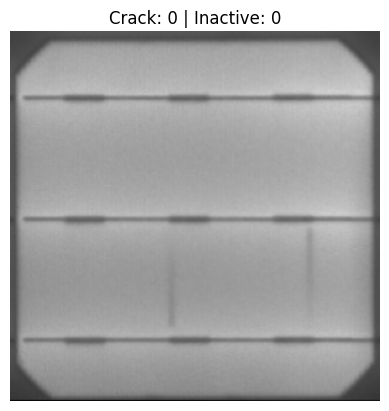

In [ ]:
for i in range(3):
    row= df.iloc[i]
    # iloc retrusn element from the df[i][j]...[n] dimensions 
    # ex for data = [[50, True], [40, False], [30, False]]
    # df.iloc[0]----> 
    # 0      50
    # 1    True
    # Name: 0, dtype: object
    # df.iloc[0,0]----> 50
    print(row)
    img_path= os.path.join("images",row['filename'])
    print(img_path)
    
    img= cv2.imread(img_path)
    img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    plt.imshow(img, cmap='gray')
    plt.title(f"Crack: {row['crack']} | Inactive: {row['inactive']}")
    plt.axis('off')
    plt.show()